 ### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import joblib

### Load Data

In [2]:
from tanzania.preprocessing import get_preprocessed_data

df_train = get_preprocessed_data("data/Train.csv")
df_test = get_preprocessed_data("data/Test.csv")

### Initial Exploration

In [3]:
print(df_train.head())
print(df_train.info())
print(df_train.describe())
print(df_train.isnull().sum())
print(df_train.select_dtypes(include='object').nunique())

   total_female  total_male  night_mainland  night_zanzibar  total_cost   
0      0.693147    0.693147        2.639057        0.000000    674602.5  \
1      0.693147    0.000000        2.708050        2.079442   3214906.5   
2      0.000000    0.693147        0.693147        3.465736   3315000.0   
3      0.693147    0.693147        2.484907        0.000000   7790250.0   
4      0.693147    0.000000        2.079442        1.609438   1657500.0   

   country_ANGOLA  country_ARGENTINA  country_AUSTRALIA  country_AUSTRIA   
0           False              False              False            False  \
1           False              False              False            False   
2           False              False              False            False   
3           False              False              False            False   
4           False              False              False            False   

   country_BELGIUM  ...  payment_mode_Credit Card  payment_mode_Other   
0            False 

### Data Cleaning

In [4]:
df_train.isnull().sum()

total_female                                            0
total_male                                              0
night_mainland                                          0
night_zanzibar                                          0
total_cost                                              0
                                                       ..
most_impressing_Friendly People                         0
most_impressing_Good service                            0
most_impressing_No comments                             0
most_impressing_Satisfies and Hope Come Back            0
most_impressing_Wonderful Country, Landscape, Nature    0
Length: 155, dtype: int64

In [5]:
df_train.shape

(4801, 155)

In [6]:
df_train_heat = df_train.drop(columns=df_train.loc[:, df_train.columns.str.startswith("country")].columns)

### Feature Engineering

###  Exploratory Data Analysis

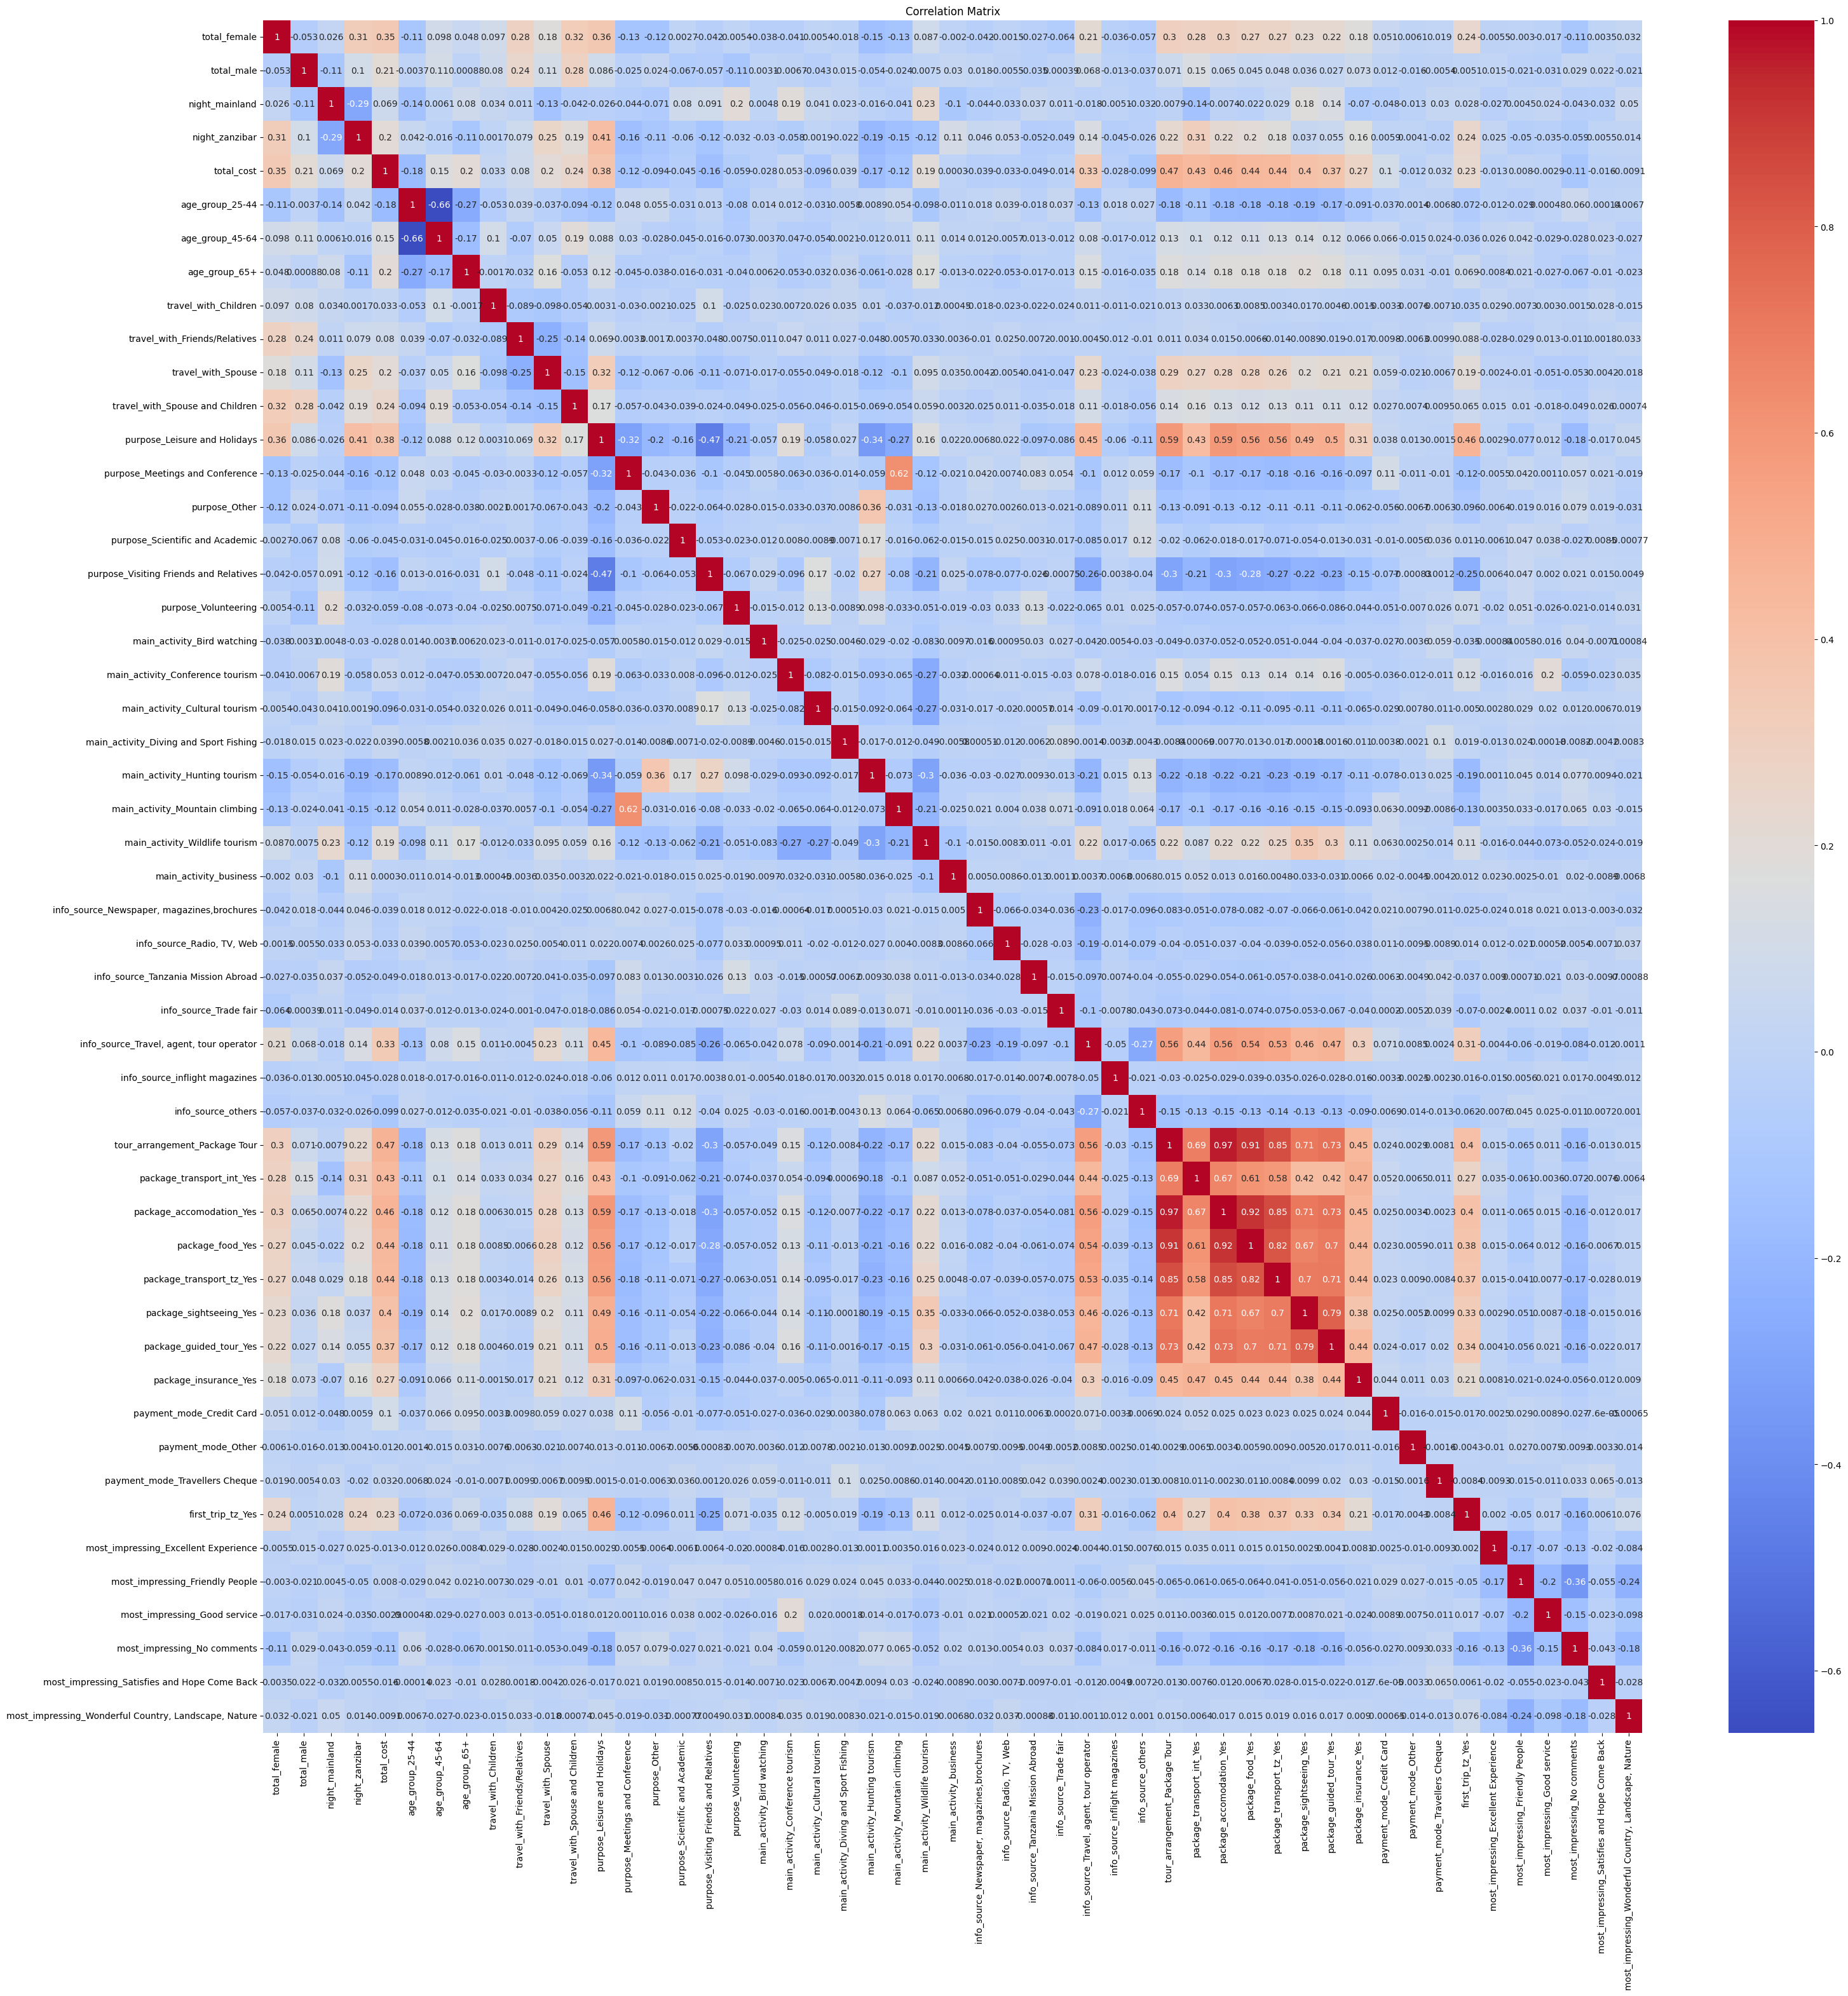

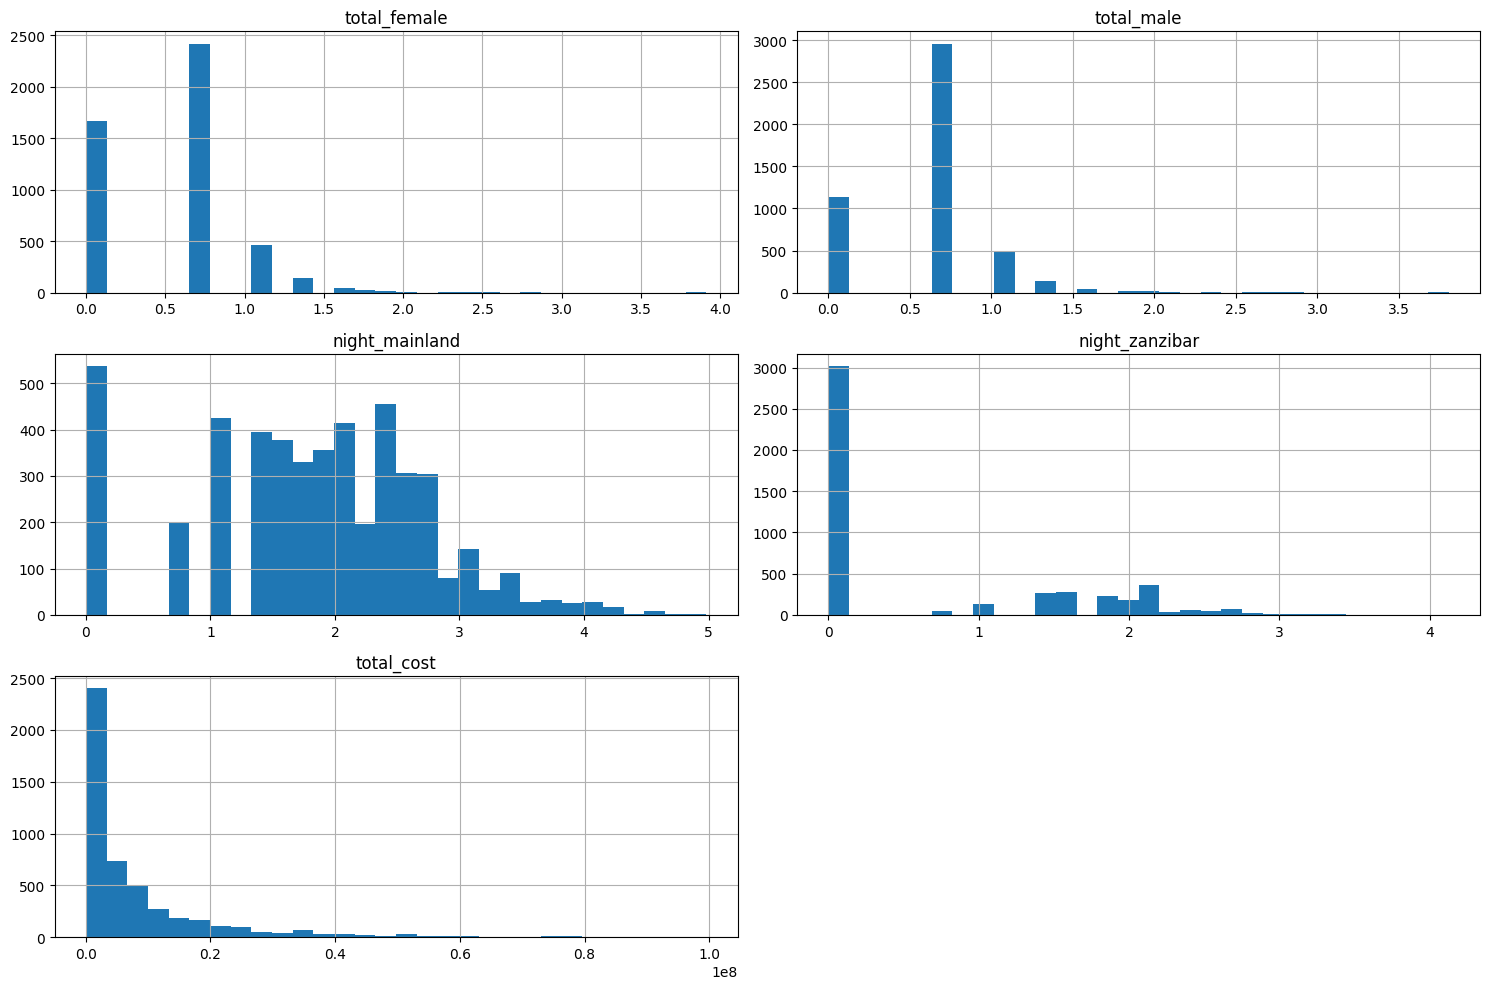

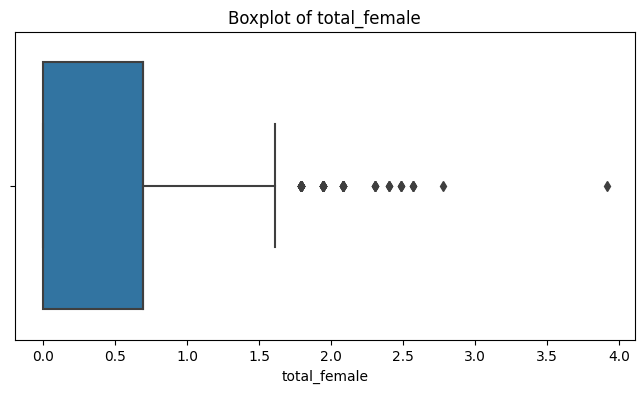

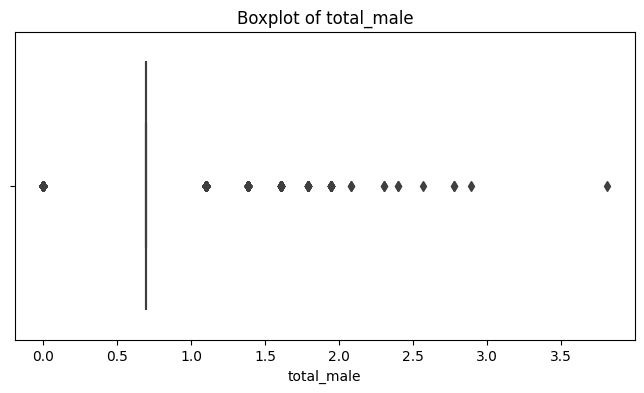

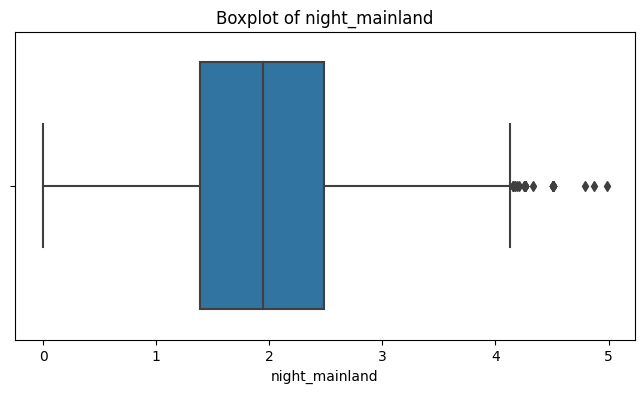

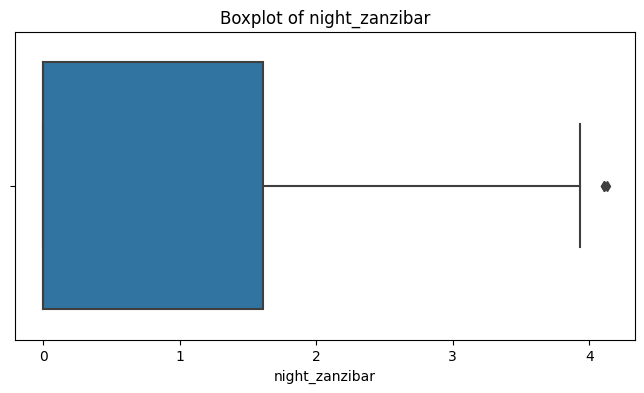

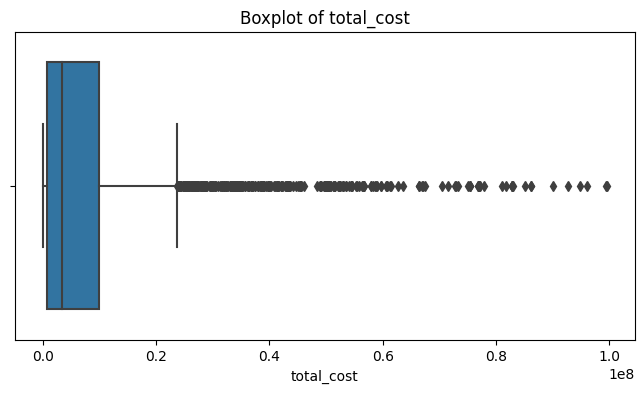

In [7]:
# Correlation matrix
plt.figure(figsize=(35, 35))
sns.heatmap(df_train_heat.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

# Histograms
df_train_heat.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

# Boxplots
for col in df_train_heat.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_train_heat[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


### Prepare Data for Modeling

In [8]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=["total_cost"])
y = df_train["total_cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Baseline Model (Mean Predictor)

In [ ]:
from sklearn.base import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

def dummy_classifier_baseline(X_train, y_train, strategy="most_frequent"):
    # Create and train DummyClassifier
    baseline = DummyClassifier(strategy=strategy)
    baseline.fit(X_train, y_train)
    
    # Predict on training data
    y_pred = baseline.predict(X_train)
    
    # Evaluate
    acc = accuracy_score(y_train, y_pred)
    print(f"DummyClassifier ({strategy}) Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_train, y_pred))
    
    return baseline, y_pred, acc


Baseline (mode) RMSE: 13814422.72
Baseline (mode) R²: -0.2893


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

def dummy_classifier_baseline(X_text, y_text, strategy="most_frequent"):
    # Create and train DummyClassifier
    baseline = DummyClassifier(strategy=strategy)
    baseline.fit(X_text, y_text)
    
    # Predict on training data
    y_pred = baseline.predict(X_text)
    
    # Evaluate
    acc = accuracy_score(y_text, y_pred)
    print(f"DummyClassifier ({strategy}) Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_text, y_pred))
    
    return baseline, y_pred, acc

Test Baseline RMSE: 13629318.86
Test Baseline R²: -0.2623


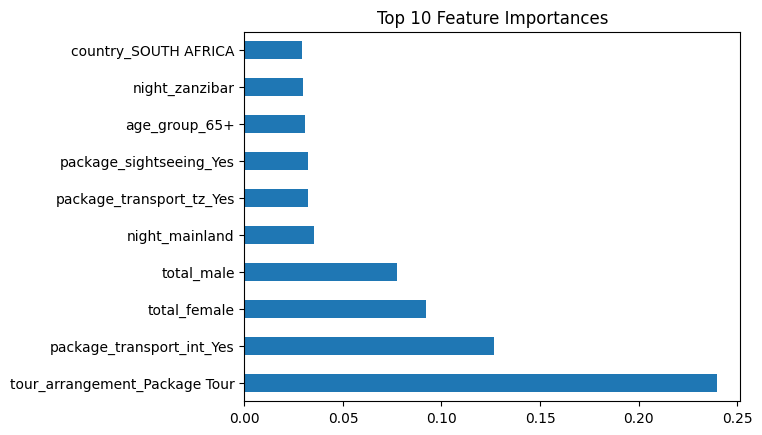

In [11]:
model = GradientBoostingRegressor().fit(X, y)
importances = model.feature_importances_
features = pd.Series(importances, index=X.columns)
features.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


# Model Training and Evaluation

# Regression Models

## Linear Regression Model

In [12]:
from tanzania.models.regression.linear_regression_model import linear_regression

linear_regression(X=X_train, y=y_train)

Linear Regression RMSE: 9322804.54
Linear Regression R²: 0.4128


(LinearRegression(),
 array([  419311.92816371,  -874809.14789167,  1936875.79318834, ...,
        25639478.63894332,  3444659.54743995, 13064378.62927835]),
 9322804.54097696,
 0.41280689256231284)

In [13]:
linear_regression(X=X_test, y=y_test)

Linear Regression RMSE: 9220253.18
Linear Regression R²: 0.4223


(LinearRegression(),
 array([11337359.71184879,  4829595.39073286, 12736564.34948293, ...,
        14231487.56918283,  6108887.74767419, 15764869.27983534]),
 9220253.178455213,
 0.422288235576616)

## Lasso Regression Model

In [14]:
from tanzania.models.regression.lasso_regression_model import lasso_regression

lasso_regression(X=X_train, y=y_train)

/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.311e+16, tolerance: 3.732e+13
  model = cd_fast.enet_coordinate_descent(
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+17, tolerance: 3.868e+13
  model = cd_fast.enet_coordinate_descent(
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the nu

Best alpha found: 1000
RMSE with best alpha: 9327636.01
R² with best alpha: 0.4122


(Lasso(alpha=1000),
 array([  214473.8264052 ,  -823456.36167407,  2550756.65907424, ...,
        25287050.12343284,  3516375.63457089, 12566044.0792223 ]),
 9327636.01053266,
 0.4121981185099841)

In [15]:
lasso_regression(X=X_test, y=y_test)

/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+16, tolerance: 1.877e+13
  model = cd_fast.enet_coordinate_descent(
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+16, tolerance: 1.809e+13
  model = cd_fast.enet_coordinate_descent(
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the nu

Best alpha found: 1000
RMSE with best alpha: 9223162.49
R² with best alpha: 0.4219


(Lasso(alpha=1000),
 array([11303412.36122189,  4640656.67480303, 12766451.18958352, ...,
        14342174.55461944,  6050663.89284158, 15888475.27811255]),
 9223162.49238591,
 0.42192360132662954)

## Ridge Regression Model

In [16]:
from tanzania.models.regression.ridge_regression_model import ridge_regression

ridge_regression(X=X_train, y=y_train)

Best alpha found: 10
RMSE with best alpha: 9361563.88
R² with best alpha: 0.4079


(Ridge(alpha=10),
 array([  -66034.27416356,  -793619.56066154,  4057223.42852702, ...,
        24986123.78297333,  3390984.39208461, 12743294.20959584]),
 9361563.884980572,
 0.4079142596615961)

In [17]:
ridge_regression(X=X_test, y=y_test)

Best alpha found: 100
RMSE with best alpha: 9510290.37
R² with best alpha: 0.3854


(Ridge(alpha=100),
 array([10994549.27704544,  3098694.96717077, 13647561.89663453, ...,
        13445039.36588792,  4979882.9818676 , 16179495.04398387]),
 9510290.368969992,
 0.38537096465689513)

## ElasticNet Regression Model

In [18]:
from tanzania.models.regression.elasticnet_regression_model import elasticnet_regression

elasticnet_regression(X=X_train, y= y_train)

/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+17, tolerance: 3.776e+13
  model = cd_fast.enet_coordinate_descent(
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+17, tolerance: 3.821e+13
  model = cd_fast.enet_coordinate_descent(
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the nu

Best ElasticNet Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
ElasticNet RMSE: 9401312.41
ElasticNet R²: 0.4029


(ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000),
 array([ -352297.8195109 ,  -876897.39136533,  4879283.17393212, ...,
        24324390.61520888,  3428761.06815902, 12781816.02055004]),
 9401312.414858943,
 0.40287567828542026,
 {'alpha': 0.1, 'l1_ratio': 0.9})

## Decision Tree Regression Model

In [19]:
from tanzania.models.regression.decision_tree_regression_model import decision_tree_regression

decision_tree_regression(X=X_train, y=y_train)

Best Parameters from Grid Search: {'max_depth': 3, 'min_samples_split': 2}
Best Decision Tree RMSE: 10205364.62
Best Decision Tree R²: 0.2964


(DecisionTreeRegressor(max_depth=3),
 array([ 2083755.88500292,  2083755.88500292,  9481032.54264583, ...,
        25459776.21081081,  2083755.88500292,  9481032.54264583]),
 10205364.616536584,
 0.2963691983070529,
 {'max_depth': 3, 'min_samples_split': 2})

In [20]:
decision_tree_regression(X=X_test, y=y_test)

Best Parameters from Grid Search: {'max_depth': 5, 'min_samples_split': 20}
Best Decision Tree RMSE: 8942638.37
Best Decision Tree R²: 0.4566


(DecisionTreeRegressor(max_depth=5, min_samples_split=20),
 array([ 8674012.39356083,  5718428.16372549, 15097103.76672131, ...,
        15097103.76672131,  2597118.88032468,  8674012.39356083]),
 8942638.36936867,
 0.4565534250550094,
 {'max_depth': 5, 'min_samples_split': 20})

## Random Forest Regression Model

In [21]:
from tanzania.models.regression.random_forest_regression_model import random_forest_regression

random_forest_regression(X=X_train, y= y_train)

Best Parameters from Grid Search: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest RMSE: 6066941.06
Random Forest R²: 0.7513


(RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42),
 array([  407471.75225055,  2636889.47085021,  1968905.31932667, ...,
        26227377.87970403,   854656.57104348, 18830012.4466803 ]),
 6066941.061539535,
 0.7513277391102615,
 {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200})

In [22]:
random_forest_regression(X=X_test, y= y_test)

Best Parameters from Grid Search: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Random Forest RMSE: 5769437.53
Random Forest R²: 0.7738


(RandomForestRegressor(min_samples_split=10, n_estimators=50, random_state=42),
 array([ 5271826.85336257,  2022275.78847067,  8221368.14291651, ...,
        21346949.8486211 ,  3713801.18269934, 21082129.92126153]),
 5769437.52759635,
 0.7738000686624961,
 {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50})

## Gradient Boosting regression Model

In [23]:
from tanzania.models.regression.gradient_boosting_regression_model import gradient_boosting_regression

gradient_boosting_regression(X=X_train, y=y_train)

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting RMSE: 7980420.75
Gradient Boosting R²: 0.5697


(GradientBoostingRegressor(random_state=42),
 array([2.56569900e+05, 1.43135396e+04, 4.23309276e+06, ...,
        2.60151748e+07, 1.30805858e+06, 1.24771065e+07]),
 7980420.75096878,
 0.5697316813080046,
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100})

## XGBoost Regression Model

In [24]:
from tanzania.models.regression.xgboost_regression_model import xgboost_regression

xgboost_regression(X=X_train, y=y_train)

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}
XGBoost RMSE: 7841998.66
XGBoost R²: 0.5845


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...),
 array([  147948.62,  -235849.66,  3086691.  , ..., 26189918.  ,
         1563408.4 , 15120065.  ], dtype=float32),
 7841998.658241232,
 0.5845284230615773,
 {'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 3,
  'n_estimators': 200}

## Support Vector Regression model

In [25]:
from tanzania.models.regression.support_vector_regression_model import svr_regression

svr_regression(X= X_train, y= y_train)

Best SVR Parameters: {'svr__C': 10, 'svr__epsilon': 0.5, 'svr__kernel': 'linear'}
SVR RMSE: 12957281.77
SVR R²: -0.1343


(Pipeline(steps=[('scaler', StandardScaler()),
                 ('svr', SVR(C=10, epsilon=0.5, kernel='linear'))]),
 array([3281259.62736824, 3313765.60847687, 3510927.84653218, ...,
        3730342.76110802, 3328488.43132659, 3538137.03579178]),
 12957281.772006785,
 -0.1342677842777944,
 {'svr__C': 10, 'svr__epsilon': 0.5, 'svr__kernel': 'linear'})

## KNN Regression Model

In [26]:
from tanzania.models.regression.knn_regression_model import knn_regression

knn_regression(X=X_train, y=y_train)

Best KNN Parameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}
KNN Regression RMSE: 8784717.80
KNN Regression R²: 0.4786


(Pipeline(steps=[('scaler', StandardScaler()),
                 ('knn', KNeighborsRegressor(n_neighbors=9, p=1))]),
 array([  456111.11111111,  2141000.        ,  3675519.16666667, ...,
        17368876.77777778,   744770.        ,  7645139.33333333]),
 8784717.799955117,
 0.4786331420560199,
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'})

# Classification Models

## Logistic Regression Classification Model

In [ ]:
y_train_class = pd.cut(y_train, bins=3, labels=["Low", "Medium", "High"])

from tanzania.models.classifications.logistic_regression_classification_model import logistic_regression

logistic_regression(X=X_train, y=y_train_class)

In [42]:
y_train_class.value_counts

<bound method IndexOpsMixin.value_counts of 1699    Low
575     Low
1239    Low
4678    Low
4253    Low
       ... 
4434    Low
466     Low
3099    Low
3779    Low
862     Low
Name: total_cost, Length: 3216, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']>

## KNN Classification Model

In [30]:
from tanzania.models.classifications.knn_classification_model import knn_classification

knn_classification(X=X_train, y=y_train_class)

Best KNN Parameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}
Accuracy: 0.9465
Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        22
         Low       0.95      1.00      0.97      3045
      Medium       0.48      0.09      0.15       149

    accuracy                           0.95      3216
   macro avg       0.48      0.36      0.37      3216
weighted avg       0.92      0.95      0.93      3216



/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=9, p=1))]),
 array(['Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low'], dtype=object),
 0.9465174129353234,
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'})

## Support Vector Machine Classification Model

In [31]:
from tanzania.models.classifications.support_vector_machine_classification_model import svm_classification

svm_classification(X=X_train, y=y_train_class)

Best SVM Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
SVM Accuracy: 0.9468
Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        22
         Low       0.95      1.00      0.97      3045
      Medium       0.00      0.00      0.00       149

    accuracy                           0.95      3216
   macro avg       0.32      0.33      0.32      3216
weighted avg       0.90      0.95      0.92      3216



/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vasiuddin/Projects/nazania-tourism-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

(Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=0.1))]),
 array(['Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low'], dtype=object),
 0.9468283582089553,
 {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'})

## Decision Tree Classification Model

In [32]:
from tanzania.models.classifications.decision_tree_classification_model import decision_tree_classification

decision_tree_classification(X=X_train, y=y_train_class)

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9496
Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.18      0.30        22
         Low       0.96      0.99      0.97      3045
      Medium       0.55      0.21      0.31       149

    accuracy                           0.95      3216
   macro avg       0.77      0.46      0.53      3216
weighted avg       0.94      0.95      0.94      3216



(DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                        random_state=42),
 array(['Low', 'Low', 'Low', ..., 'Medium', 'Low', 'Low'], dtype=object),
 0.9496268656716418,
 {'criterion': 'entropy',
  'max_depth': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 2})

## Random Forest Classification Model

In [35]:
from tanzania.models.classifications.random_forest_classification_model import random_forest_classification

random_forest_classification(X=X_train, y=y_train_class)

Best Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.9593
Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.14      0.24        22
         Low       0.96      1.00      0.98      3045
      Medium       1.00      0.25      0.40       149

    accuracy                           0.96      3216
   macro avg       0.99      0.46      0.54      3216
weighted avg       0.96      0.96      0.95      3216



(RandomForestClassifier(bootstrap=False, min_samples_leaf=2, random_state=42),
 array(['Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low'], dtype=object),
 0.9592661691542289,
 {'bootstrap': False,
  'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100})

## K-Means Clustering Model

In [47]:
from tanzania.models.clusters.kmean_clustering_model import kmeans_clustering


kmeans_clustering(X, cluster_range=(2, 10))

KMeans Clustering Grid Search Results:

n_clusters=2 → Silhouette Score: 0.1869
n_clusters=3 → Silhouette Score: 0.1926
n_clusters=4 → Silhouette Score: 0.1633
n_clusters=5 → Silhouette Score: 0.1432
n_clusters=6 → Silhouette Score: 0.1240
n_clusters=7 → Silhouette Score: 0.1111
n_clusters=8 → Silhouette Score: 0.1063
n_clusters=9 → Silhouette Score: 0.0943
n_clusters=10 → Silhouette Score: 0.0832

Best KMeans Model:
n_clusters=3 → Best Silhouette Score: 0.1926


(KMeans(n_clusters=3, n_init='auto', random_state=42), 3, 0.19256434174132184)